# B1 Photoelectric effect
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2021/12/15

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf,UnivariateSpline
from scipy.signal import argrelextrema

## Planck constant

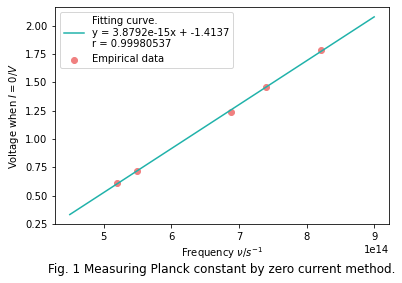

In [2]:
df1 = pd.read_csv('B1-Data\plank.csv')
df1['f'] = 3e+8/df1['lam']

plk_func = np.polyfit(df1['f'], df1['U'], deg=1)

V_dns = np.linspace(4.5e+14, 9e+14, 500)
U_reg = np.polyval(plk_func, V_dns)

r = np.corrcoef(df1['f'], df1['U'])[0,1]

A1, A2 = tuple(plk_func)
plt.scatter(df1['f'], df1['U'], color='lightcoral', label='Empirical data')
plt.plot(V_dns, U_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.4e}x + {:.4f}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()

plt.xlabel(r'Frequency $\nu / s^{-1}$')
plt.ylabel('Voltage when $I = 0/V$')
plt.title('Fig. 1 Measuring Planck constant by zero current method.', y=-0.25)
plt.savefig(r'B1-Output\fig.1.png', bbox_inches = 'tight', dpi=300)

## The volt ampere characteristic curve

In [5]:
df2 = pd.read_csv('B1-Data/UI.csv')
df2

,U,A,B,C,D,E,F,G
0,0,11,3,2.0,16,22,2.5,40
1,2,41,15,9.3,57,83,10.8,160
2,4,65,23,16.0,89,143,18.0,260
3,6,84,29,20.4,114,188,23.0,330
4,8,107,35,24.1,146,240,30.3,420
5,10,126,40,27.7,170,285,36.3,490
6,12,143,45,31.7,196,322,41.9,560
7,14,155,49,35.0,218,350,46.6,620
8,16,169,53,37.2,232,378,50.5,670
9,18,182,56,39.1,247,405,54.4,720


### Muti wavelength

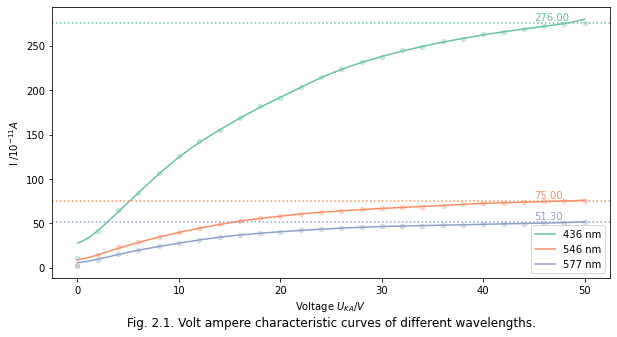

In [6]:
fig = plt.figure(figsize=(10, 5))
wavelength = ['436 nm', '546 nm', '577 nm']
map = {0:1, 1:2, 2:3}
for i in np.arange(0, 3):
    idx = map[i]
    U_dns = np.linspace(0,50,500)
    itp_func = Rbf(df2['U'], df2.iloc[:,idx], smooth = 1)
    itp = itp_func(U_dns)
    plt.plot(U_dns, itp, label=wavelength[i], color=plt.cm.Set2(i))
    plt.scatter(df2['U'], df2.iloc[:,idx], alpha=0.3, s=20, color=plt.cm.Set2(i))
    plt.axhline(y = df2.iloc[25, idx], ls=':', color=plt.cm.Set2(i))
    plt.annotate('{:.2f}'.format(df2.iloc[25, idx]), xy=(45, df2.iloc[25, idx]+3), color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Voltage $U_{KA}/V$')
plt.ylabel('I $/10^{-11} A$')
plt.title('Fig. 2.1. Volt ampere characteristic curves of different wavelengths.', y=-0.20)
plt.savefig(r'B1-Output\fig.2.1.png', bbox_inches = 'tight', dpi=300)

### Distance

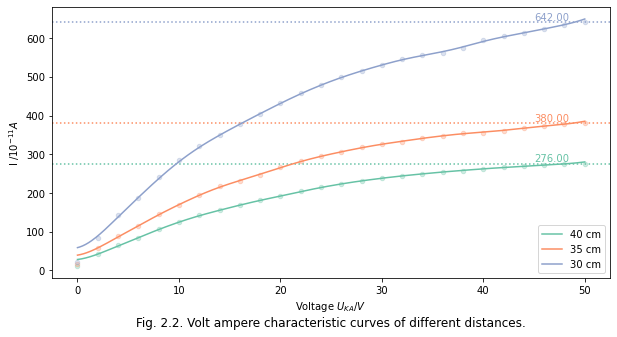

In [7]:
fig = plt.figure(figsize=(10, 5))
wavelength = ['40 cm', '35 cm', '30 cm']
map = {0:1, 1:4, 2:5}
for i in np.arange(0, 3):
    idx = map[i]
    U_dns = np.linspace(0,50,500)
    itp_func = Rbf(df2['U'], df2.iloc[:,idx], smooth = 1)
    itp = itp_func(U_dns)
    plt.plot(U_dns, itp, label=wavelength[i], color=plt.cm.Set2(i))
    plt.scatter(df2['U'], df2.iloc[:,idx], alpha=0.3, s=20, color=plt.cm.Set2(i))
    plt.axhline(y = df2.iloc[25, idx], ls=':', color=plt.cm.Set2(i))
    plt.annotate('{:.2f}'.format(df2.iloc[25, idx]), xy=(45, df2.iloc[25, idx]+5), color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Voltage $U_{KA}/V$')
plt.ylabel('I $/10^{-11} A$')
plt.title('Fig. 2.2. Volt ampere characteristic curves of different distances.', y=-0.20)
plt.savefig(r'B1-Output\fig.2.2.png', bbox_inches = 'tight', dpi=300)

### Diaphragms

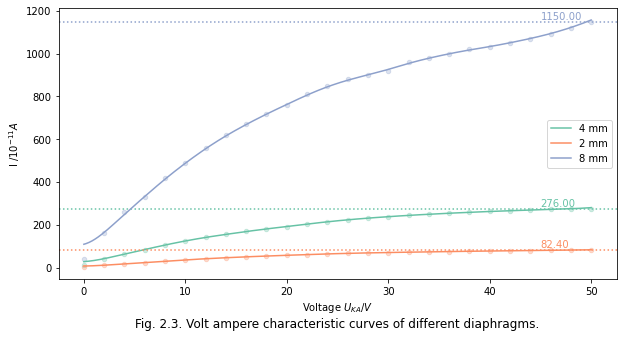

In [8]:
fig = plt.figure(figsize=(10, 5))
wavelength = ['4 mm', '2 mm', '8 mm']
map = {0:1, 1:6, 2:7}
for i in np.arange(0, 3):
    idx = map[i]
    U_dns = np.linspace(0,50,500)
    itp_func = Rbf(df2['U'], df2.iloc[:,idx], smooth = 1)
    itp = itp_func(U_dns)
    plt.plot(U_dns, itp, label=wavelength[i], color=plt.cm.Set2(i))
    plt.scatter(df2['U'], df2.iloc[:,idx], alpha=0.3, s=20, color=plt.cm.Set2(i))
    plt.axhline(y = df2.iloc[25, idx], ls=':', color=plt.cm.Set2(i))
    plt.annotate('{:.2f}'.format(df2.iloc[25, idx]), xy=(45, df2.iloc[25, idx]+10), color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Voltage $U_{KA}/V$')
plt.ylabel('I $/10^{-11} A$')
plt.title('Fig. 2.3. Volt ampere characteristic curves of different diaphragms.', y=-0.20)
plt.savefig(r'B1-Output\fig.2.3.png', bbox_inches = 'tight', dpi=300)

## saturation photocurrent

In [19]:
df31 = pd.read_csv('B1-Data/sp-1.csv')
df32 = pd.read_csv('B1-Data/sp-2.csv')

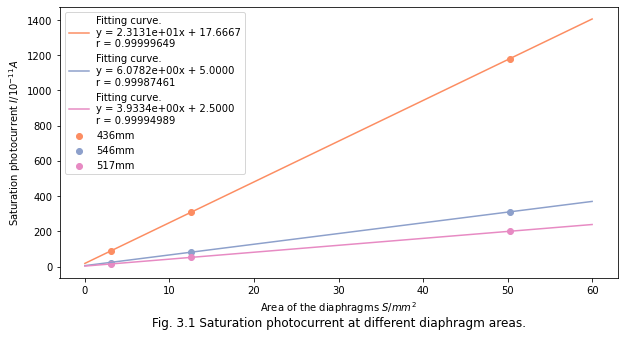

In [20]:
df31['s'] = np.pi*(df31['d']/2)**2
fig = plt.figure(figsize=(10, 5))
for i in np.arange(1, 4):
    U_dns = np.linspace(0,60,500)
    plk_func = np.polyfit(df31['s'], df31.iloc[:,i], deg=1)
    I_reg = np.polyval(plk_func, U_dns)
    r = np.corrcoef(df31['s'], df31.iloc[:,i])[0,1]
    A1, A2 = tuple(plk_func)
    plt.scatter(df31['s'], df31.iloc[:,i], color=plt.cm.Set2(i), label=df31.columns[i])
    plt.plot(U_dns, I_reg, color=plt.cm.Set2(i),
                          label='Fitting curve. \ny = {:.4e}x + {:.4f}\nr = {:.8f}'
                          .format(A1, A2, r)) 
                          
plt.legend()

plt.xlabel('Area of the diaphragms $S / mm^2$')
plt.ylabel('Saturation photocurrent $I /10^{-11} A$')
plt.title('Fig. 3.1 Saturation photocurrent at different diaphragm areas.', y=-0.2)
plt.savefig(r'B1-Output\fig.3.1.png', bbox_inches = 'tight', dpi=300)

In [21]:
df31

,d,436mm,546mm,517mm,s
0,2,89,22,14,3.141593
1,4,310,84,53,12.566371
2,8,1180,310,200,50.265482


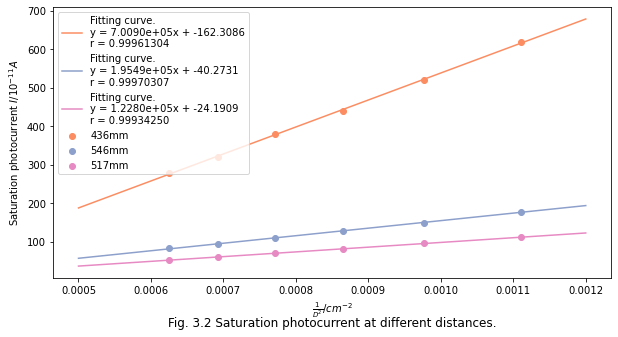

In [22]:
df32['P'] = 1/(df32['d'])**2
fig = plt.figure(figsize=(10, 5))
for i in np.arange(1, 4):
    U_dns = np.linspace(0.0005, 0.0012,100)
    plk_func = np.polyfit(df32['P'], df32.iloc[:,i], deg=1)
    I_reg = np.polyval(plk_func, U_dns)
    r = np.corrcoef(df32['P'], df32.iloc[:,i])[0,1]
    A1, A2 = tuple(plk_func)
    plt.scatter(df32['P'], df32.iloc[:,i], color=plt.cm.Set2(i), label=df32.columns[i])
    plt.plot(U_dns, I_reg, color=plt.cm.Set2(i),
                          label='Fitting curve. \ny = {:.4e}x + {:.4f}\nr = {:.8f}'
                          .format(A1, A2, r)) 
                          
plt.legend()

plt.xlabel(r'$\frac{1}{D^2} / cm^{-2}$')
plt.ylabel('Saturation photocurrent $I /10^{-11} A$')
plt.title('Fig. 3.2 Saturation photocurrent at different distances.', y=-0.2)
plt.savefig(r'B1-Output\fig.3.2.png', bbox_inches = 'tight', dpi=300)

In [23]:
df32

,d,436mm,546mm,517mm,P
0,40,280,83,53,0.000625
1,38,320,95,61,0.000693
2,36,380,110,70,0.000772
3,34,440,128,81,0.000865
4,32,520,150,97,0.000977
5,30,620,178,112,0.001111
